In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)


%matplotlib inline

## Load Data

In [6]:
incident_data = pd.read_csv(
    "../data/clean/incident_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
stop_data = pd.read_csv(
    "../data/clean/stop_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
arrest_data = pd.read_csv(
    "../data/clean/arrest_data.csv.gz",
    parse_dates=["date", "year", "month_year"],
    low_memory=False,
)
officer_data = pd.read_csv(
    "../data/clean/officers.csv", parse_dates=["year"], low_memory=False
)

In [7]:
incident_data.head().T

,0,1,2,3,4
x,-76.963243,-77.073113,-76.971909,-76.991735,-77.036482
y,38.925035,38.937336,38.84779,38.863048,38.92793
ccn,21029645,21029649,21029667,21029668,21029675
report_dat,2021/03/08 14:06:13+00,2021/03/08 14:27:38+00,2021/03/08 15:54:20+00,2021/03/08 15:46:58+00,2021/03/08 16:13:18+00
shift,DAY,DAY,DAY,DAY,DAY
method,OTHERS,OTHERS,OTHERS,OTHERS,OTHERS
offense,THEFT F/AUTO,BURGLARY,THEFT/OTHER,THEFT F/AUTO,BURGLARY
block,3100 - 3199 BLOCK OF APPLE ROAD NE,3700 - 3799 BLOCK OF PORTER STREET NW,2200 - 2299 BLOCK OF SAVANNAH STREET SE,2300 - 2399 BLOCK OF MARTIN LUTHER KING JR AVE...,3032 - 3099 BLOCK OF 16TH STREET NW
xblock,403187.48,393661.44,402438.66448,400717.53,396836.88
yblock,139684.18,141051.53,131109.085399,132802.55,140005.49


In [8]:
stop_data.head().T

,0,1,2,3,4
stop_reason_nonticket,Warrant/court order,Warrant/court order,Warrant/court order,Warrant/court order,Warrant/court order
ethnicity,Black,Black,Black,Black,Hispanic
stop_reason_ticket,NaN,NaN,NaN,NaN,NaN
stop_type,Non-ticket Stop,Non-ticket Stop,Non-ticket Stop,Non-ticket Stop,Non-ticket Stop
age,22.0,28.0,33.0,55.0,29.0
pedestrian,0,0,0,0,0
prop_srch_reason_consent,NaN,NaN,NaN,NaN,NaN
prop_srch_reason_warrant,NaN,NaN,NaN,NaN,NaN
prop_pat_down_obj_seized,NaN,NaN,NaN,NaN,NaN
prop_pat_down_obj,NaN,NaN,NaN,NaN,NaN


In [9]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/11/14 05:00:00+00,2013/11/20 05:00:00+00,2013/12/03 05:00:00+00,2013/12/05 05:00:00+00,2013/12/09 05:00:00+00
hour,6,15,0,21,23
ccn,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...
arrest_number,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...
age,37,39,40,65,31
defendant_psa,Out of State,602,Out of State,502,702
defendant_district,Out of State,6D,Out of State,5D,7D
race,WHITE,BLACK,BLACK,BLACK,BLACK


In [10]:
officer_data

,year,officers
0,1999-01-01,3466
1,2000-01-01,3628
2,2001-01-01,3616
3,2002-01-01,3637
4,2003-01-01,3664
5,2004-01-01,3800
6,2005-01-01,3801
7,2006-01-01,3800
8,2007-01-01,3910
9,2008-01-01,4051


## Data Ranges

In [11]:
[(d.year.min(), d.year.max()) for d in [incident_data, stop_data, arrest_data]]

[(Timestamp('1800-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')),
 (Timestamp('2019-01-01 00:00:00'), Timestamp('2024-01-01 00:00:00')),
 (Timestamp('2013-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'))]

In [12]:
[(d.date.min(), d.date.max()) for d in [incident_data, stop_data, arrest_data]]

[(Timestamp('1800-01-15 19:08:58+0000', tz='UTC'),
  Timestamp('2024-03-18 03:15:00+0000', tz='UTC')),
 (Timestamp('2019-07-22 04:00:00+0000', tz='UTC'),
  Timestamp('2024-01-01 04:32:00+0000', tz='UTC')),
 ('2013-01-01 05:00:00+00:00', '2023-12-31 00:00:00')]

## MPD Staffing

[Text(0.5, 1.0, 'MPD Historical Sworn Staffing')]

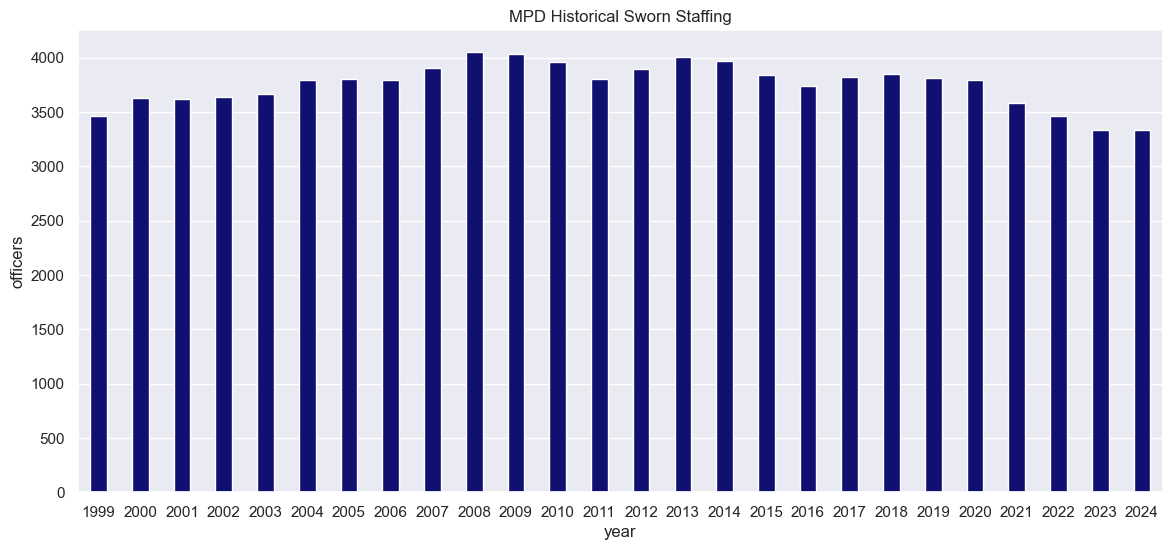

In [13]:
sns.set(rc={"figure.figsize": (14, 6)})
sns.barplot(
    data=officer_data,
    x=officer_data.year.dt.strftime("%Y"),  # hack
    y="officers",
    color="navy",
    width=0.4,
).set(title="MPD Historical Sworn Staffing")

## Scale Incident Data to 2019

In [14]:
incidents_by_month = (
    incident_data.groupby(["month_year", "offense"]).ccn.count().reset_index()
)

In [15]:
# fix this if older data is added
incidents_by_month = incidents_by_month[
    (incidents_by_month.month_year > "2015-12")
    & (incidents_by_month.month_year < "2024-03")
]

# very few arsons, just dropping this
incidents_by_month = incidents_by_month[incidents_by_month.offense != "arson"]

In [16]:
incidents_by_month.columns = ["Date", "Offense", "Count"]

In [17]:
incidents_by_month.tail(20)

,Date,Offense,Count
1158,2023-12-01,THEFT F/AUTO,619
1159,2023-12-01,THEFT/OTHER,1080
1160,2024-01-01,ARSON,1
1161,2024-01-01,ASSAULT W/DANGEROUS WEAPON,78
1162,2024-01-01,BURGLARY,76
1163,2024-01-01,HOMICIDE,11
1164,2024-01-01,MOTOR VEHICLE THEFT,435
1165,2024-01-01,ROBBERY,216
1166,2024-01-01,SEX ABUSE,19
1167,2024-01-01,THEFT F/AUTO,526


In [18]:
incidents_2019_monthly_averages = (
    incidents_by_month[
        incidents_by_month.Date.dt.strftime("%Y") == "2019"
    ]  # wrong way to do this
    .groupby("Offense")
    .agg({"Count": "mean"})
    .to_dict()
)[
    "Count"
]  # hack to get rid of nested dict

In [19]:
incidents_by_month["Normalized Count"] = incidents_by_month.apply(
    lambda x: x["Count"] / incidents_2019_monthly_averages[x["Offense"]], axis=1
)

In [20]:
# sanity check
incidents_2019_monthly_averages

{'ARSON': 2.0,
 'ASSAULT W/DANGEROUS WEAPON': 130.91666666666666,
 'BURGLARY': 105.66666666666667,
 'HOMICIDE': 13.666666666666666,
 'MOTOR VEHICLE THEFT': 182.83333333333334,
 'ROBBERY': 186.08333333333334,
 'SEX ABUSE': 16.416666666666668,
 'THEFT F/AUTO': 892.8333333333334,
 'THEFT/OTHER': 1290.6666666666667}

## Incidents by Type

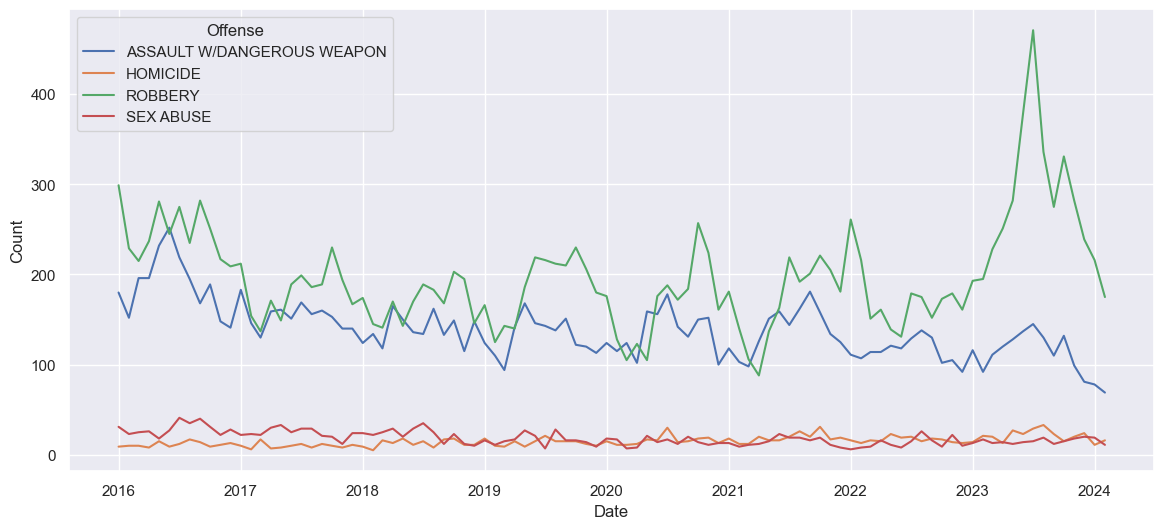

In [21]:
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.lineplot(
    data=incidents_by_month[
        incidents_by_month.Offense.isin(
            ["ASSAULT W/DANGEROUS WEAPON", "HOMICIDE", "ROBBERY", "SEX ABUSE"]
        )
    ],
    x="Date",
    y="Count",
    hue="Offense",
)

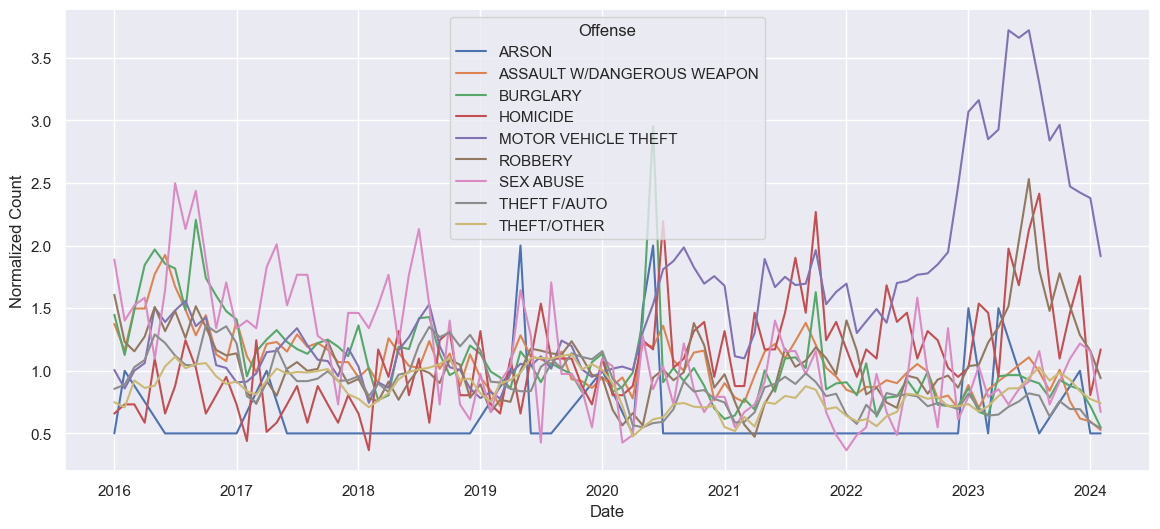

In [22]:
# Too busy and needs the x fixed
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.lineplot(data=incidents_by_month, x="Date", y="Normalized Count", hue="Offense")

In [23]:
# Break out invariant reporting and other types of crimes
incidents_by_month["Crime Type"] = [
    i if i in ["HOMICIDE", "MOTOR VEHICLE THEFT"] else "Other Crimes"
    for i in incidents_by_month.Offense
]

incidents_by_month = incidents_by_month.sort_values(["Offense", "Date"]).reset_index(
    drop=True
)  # hack for graph ordering

In [24]:
incidents_by_month = incidents_by_month[
    incidents_by_month.Offense != "ARSON"
].reset_index(drop=True)  # too few of these, makes a mess

In [25]:
# This equal weights the crime categories rather than summing counts of all crimes in these categories and normalizing that.
# Could make a good argument for doing it either way but this way is easier for now.
incidents_by_month_rollup = (
    incidents_by_month.groupby(["Date", "Crime Type"])["Normalized Count"]
    .mean()
    .reset_index()
    .sort_values(["Crime Type", "Date"])
    .reset_index(drop=True)
)

In [26]:
incidents_by_month_rollup["Normalized Count 6 Month Rolling Avg"] = (
    incidents_by_month_rollup.groupby("Crime Type")
    .rolling(6, 1)["Normalized Count"]
    .mean()
    .reset_index(drop=True)
)

In [27]:
incidents_by_month["Normalized Count 6 Month Rolling Avg"] = (
    incidents_by_month.groupby("Offense")
    .rolling(6, 1)["Normalized Count"]
    .mean()
    .reset_index(drop=True)
)

[Text(0.5, 1.0, 'Crime Incidents per Month, Homicide and Car Theft vs. Others (normalized to 2019)')]

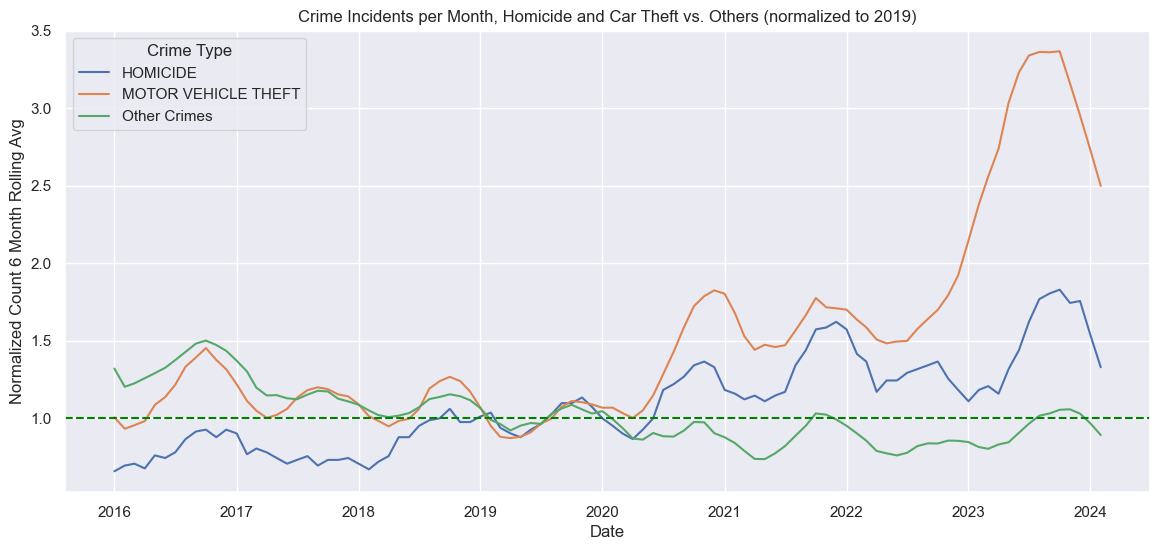

In [28]:
# labels still bad but it makes the point
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.lineplot(
    data=incidents_by_month_rollup,
    x="Date",
    y="Normalized Count 6 Month Rolling Avg",
    hue="Crime Type",
    errorbar=None,
)
g.axhline(y=1, ls="--", c="green")
g.set(
    title="Crime Incidents per Month, Homicide and Car Theft vs. Others (normalized to 2019)"
)

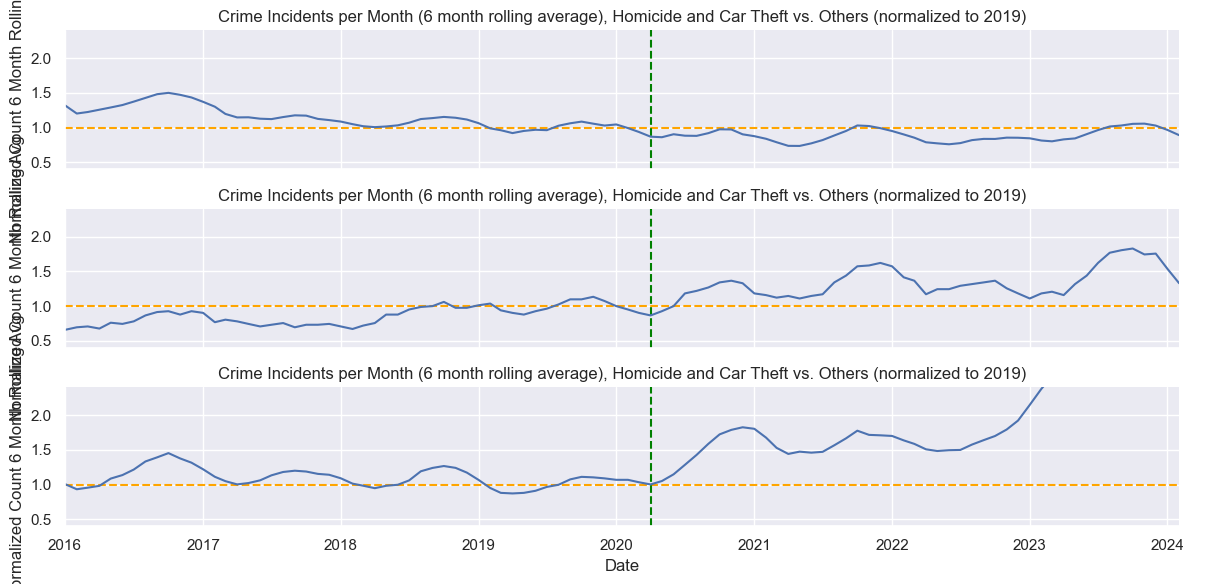

In [29]:
# facet grid instead
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.FacetGrid(data=incidents_by_month, row="Crime Type", height=2, aspect=6)
g.set(
    xlim=(incidents_by_month.Date.min(), incidents_by_month.Date.max())
)  # something is broken, this is a hack
g.set(ylim=(0.4, 2.4))
g.map(plt.axhline, y=1, ls="--", c="orange")
g.map(plt.axvline, x=pd.to_datetime("2020-04-01"), ls="--", c="green")
g.map_dataframe(sns.lineplot, x="Date", y="Normalized Count 6 Month Rolling Avg", errorbar=None)
g.add_legend()
g.set(
    title="Crime Incidents per Month (6 month rolling average), Homicide and Car Theft vs. Others (normalized to 2019)"
)

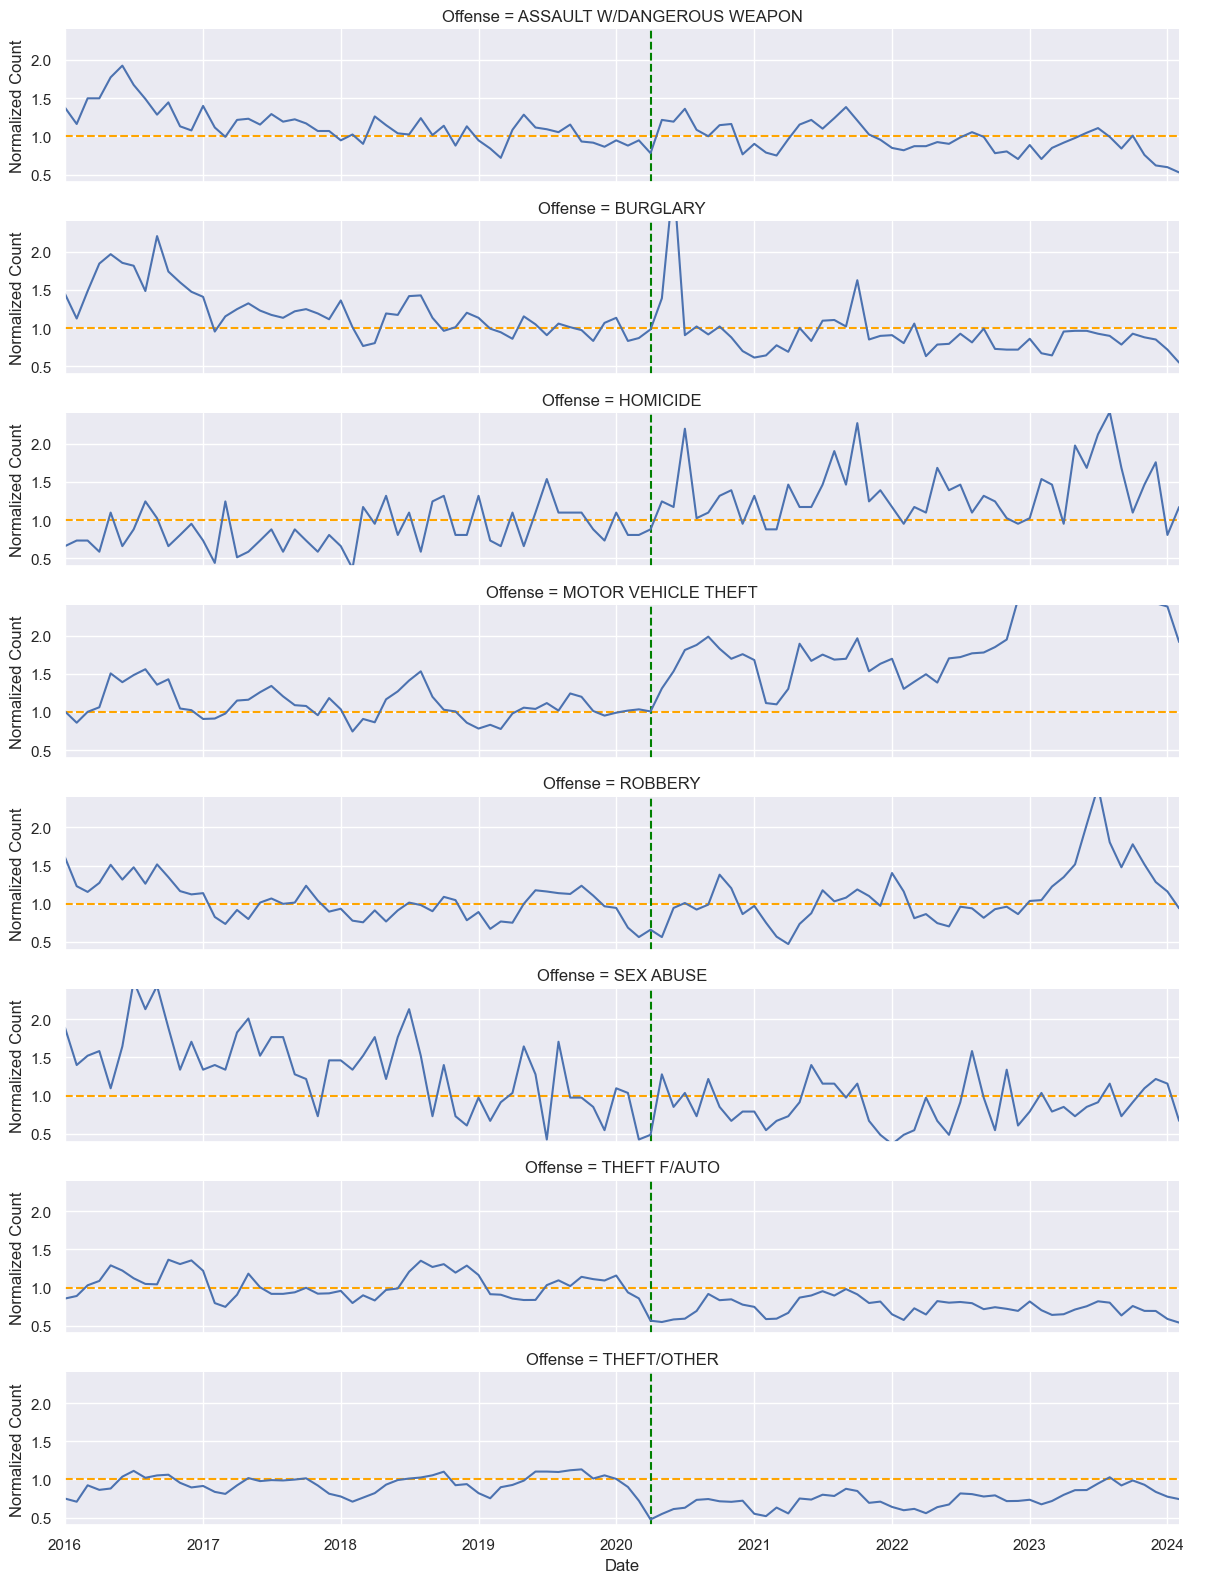

In [30]:
# facet grid of all offense types
sns.set(rc={"figure.figsize": (14, 6)})
g = sns.FacetGrid(data=incidents_by_month, row="Offense", height=2, aspect=6)
g.set(
    xlim=(incidents_by_month.Date.min(), incidents_by_month.Date.max())
)  # something is broken, this is a hack
g.set(ylim=(0.4, 2.4))
g.map(plt.axhline, y=1, ls="--", c="orange")
g.map(plt.axvline, x=pd.to_datetime("2020-04-01"), ls="--", c="green")
g.map_dataframe(sns.lineplot, x="Date", y="Normalized Count")
g.add_legend()

## Stop Data

In [31]:
# This is a mess and needs cleanup
stop_data.stop_reason_nonticket.value_counts()

stop_reason_nonticket
Call for service                                                                                                                                                                          44209
Traffic violation                                                                                                                                                                         12502
Warrant/court order                                                                                                                                                                       10631
BOLO/Lookout                                                                                                                                                                               7383
Individual<U+0092>s actions                                                                                                                                                                6794
                  

In [32]:
stop_data.stop_reason_ticket.value_counts().head()

stop_reason_ticket
Observed moving violation       157158
Observed equipment violation     18243
Calls for service                12775
Response to Crash                10537
BOLO/Lookout                       468
Name: count, dtype: int64

[Text(0.5, 1.0, 'MPD Stops Recorded as Call for Service per Month'),
 Text(0.5, 0, ''),
 (0.0, 1686.0)]

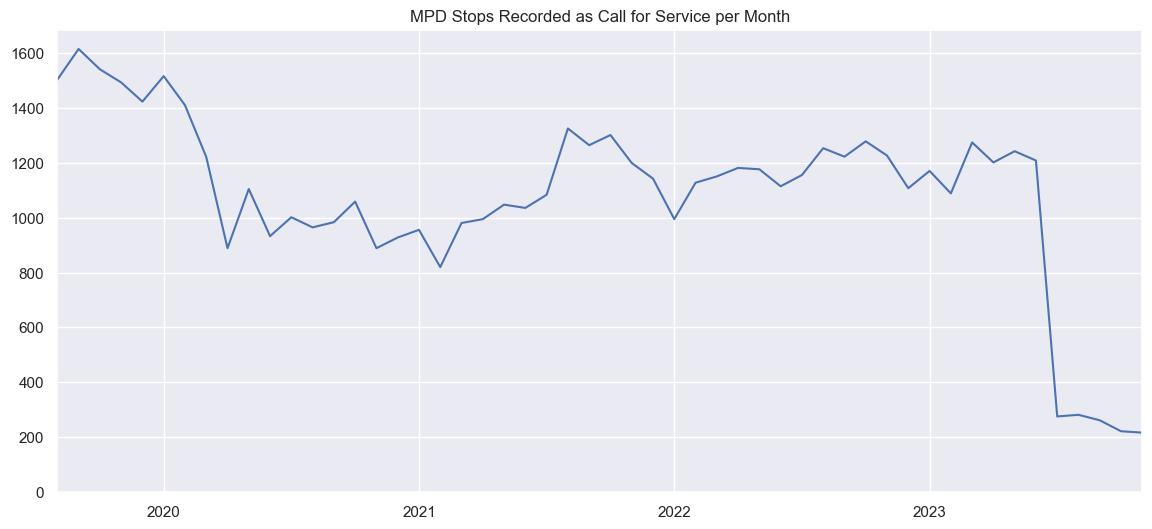

In [33]:
g = (
    stop_data[
        (stop_data.stop_reason_nonticket == "Call for service")
        | (stop_data.stop_reason_ticket == "Calls for service")
    ]
    .groupby("month_year")
    .objectid.count()[1:-1]
    .plot()
)  # [1:-1] to remove incomplete months

g.set(
    title="MPD Stops Recorded as Call for Service per Month",
    xlabel=None,
    ylim=(0, None),
)

[Text(0.5, 1.0, 'MPD Stops per Month'), Text(0.5, 0, ''), (0.0, 14080.4)]

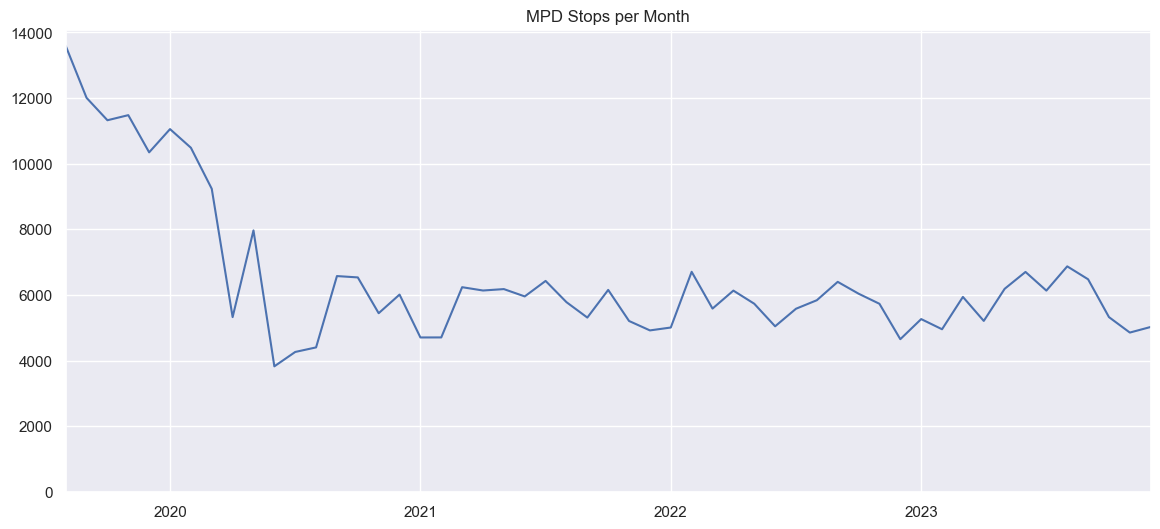

In [34]:
g = (
    stop_data.groupby("month_year").objectid.count()[1:-1].plot()
)  # [1:-1] to remove incomplete months

g.set(title="MPD Stops per Month", xlabel=None, ylim=(0, None))

In [35]:
stop_data.groupby(["month_year", "stop_reason_nonticket"]).objectid.count().reset_index()[1:-1]

,month_year,stop_reason_nonticket,objectid
1,2019-07-01,BOLO/Lookout; Call for service,21
2,2019-07-01,BOLO/Lookout; Call for service; Individual<U+0...,1
3,2019-07-01,BOLO/Lookout; Call for service; Individual<U+0...,1
4,2019-07-01,BOLO/Lookout; Call for service; Information ob...,2
5,2019-07-01,BOLO/Lookout; Call for service; Prior knowledg...,1
...,...,...,...
9151,2023-12-01,"Response to crash, Traffic violation",1
9152,2023-12-01,Suspicion of criminal activity (self-initiated),131
9153,2023-12-01,Suspicion of criminal activity (self-initiate...,6
9154,2023-12-01,Traffic violation,162


[Text(0.5, 1.0, 'MPD Observed Equipment Violation Stops per Month'),
 Text(0.5, 0, ''),
 (0.0, 1209.25)]

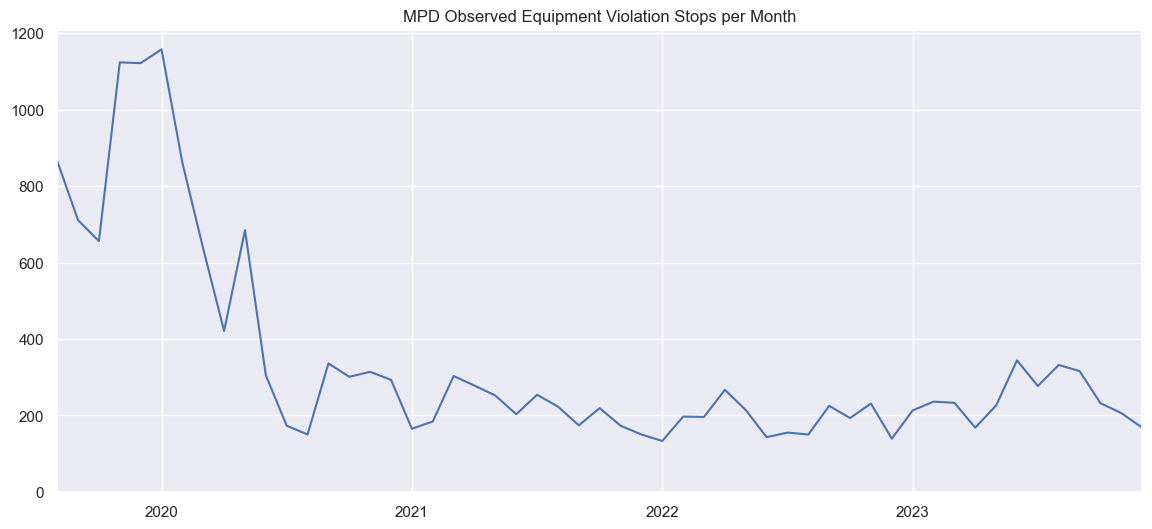

In [36]:
g = (
    stop_data[stop_data.stop_reason_ticket == "Observed equipment violation"]
    .groupby("month_year")
    .objectid.count()[1:]
    .plot()
)  # [1:] to remove an incomplete month
g.set(
    title="MPD Observed Equipment Violation Stops per Month",
    xlabel=None,
    ylim=(0, None),
)

[Text(0.5, 1.0, 'MPD Observed Moving Violation Stops per Month'),
 Text(0.5, 0, ''),
 (0.0, 7690.6)]

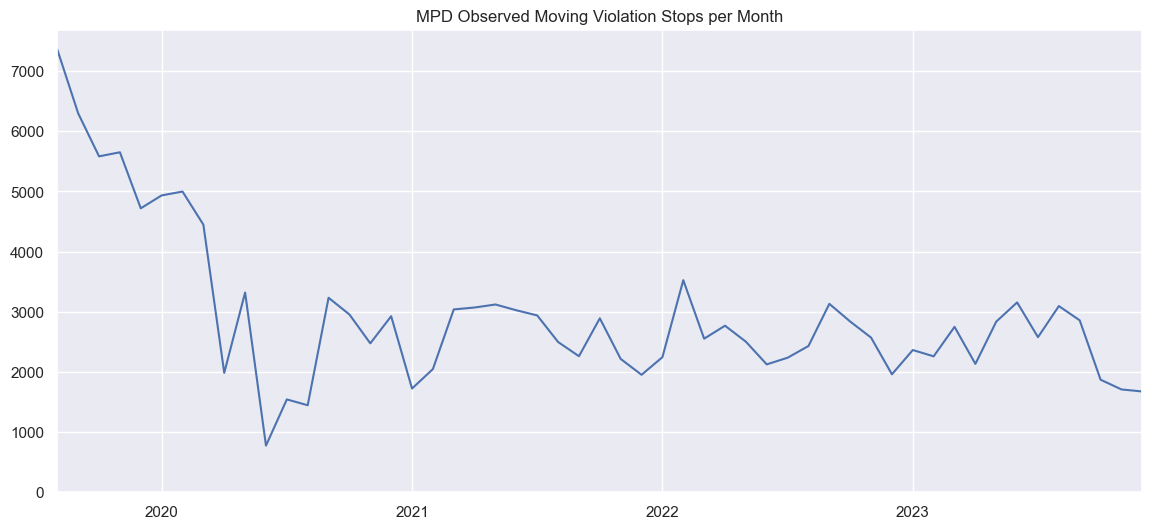

In [37]:
g = (
    stop_data[stop_data.stop_reason_ticket == "Observed moving violation"]
    .groupby("month_year")
    .objectid.count()[1:-1]
    .plot()
)  # [1:-1] to remove incomplete months
g.set(
    title="MPD Observed Moving Violation Stops per Month",
    xlabel=None,
    ylim=(0, None),
)

In [38]:
stop_data.stop_reason_nonticket.value_counts().head()

stop_reason_nonticket
Call for service               44209
Traffic violation              12502
Warrant/court order            10631
BOLO/Lookout                    7383
Individual<U+0092>s actions     6794
Name: count, dtype: int64

In [39]:
stop_data.stop_reason_ticket.value_counts().head()

stop_reason_ticket
Observed moving violation       157158
Observed equipment violation     18243
Calls for service                12775
Response to Crash                10537
BOLO/Lookout                       468
Name: count, dtype: int64

## Arrest Data

In [40]:
# temporary fix because I don't want to re-run ETL

def arrest_category_cleanup(df: pd.DataFrame) -> pd.DataFrame:
    """
    Data through 2017 has "Na" dropped from the strings in the category field,
    replaced with a single space.
    Like Dave says, if you don't have the right tools, don't use a spoon.
    This also corrects an unrelated errors in the Release Violations and
    Fraud/Financial categories, rolling up a few random values.
    """
    fixes = {
        " rcotics": "Narcotics",
        "Fraud and Fi ncial Crimes": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Coun)": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Forg)": "Fraud and Financial Crimes",
        "Fraud and Financial Crimes (Frau)": "Fraud and Financial Crimes",
        "Kid pping": "Kidnapping",
        "Release Violations/Fugitive (Fug)": "Release Violations/Fugitive",
        "Release Violations/Fugitive (Warr)": "Release Violations/Fugitive",
        "Release Violations": "Release Violations/Fugitive"
    }

    df["category"] = df.category.apply(lambda x: fixes.get(x, x))
    return df

In [41]:
arrest_data = arrest_category_cleanup(arrest_data)

[Text(0.5, 1.0, 'MPD Monthly Arrests'), Text(0.5, 0, ''), (0.0, 3313.45)]

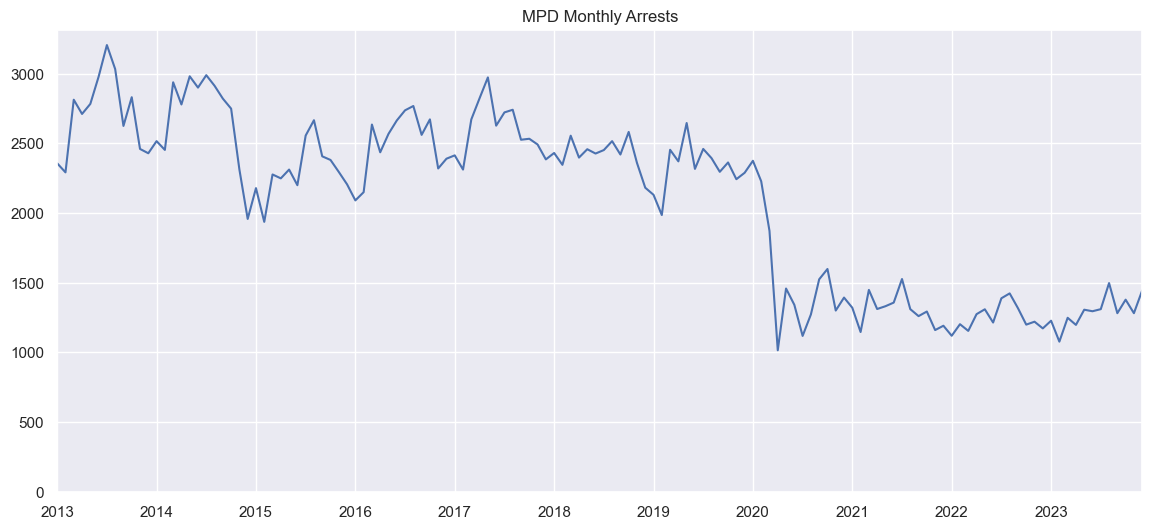

In [42]:
sns.set(rc={"figure.figsize": (14, 6)})
g = arrest_data.groupby("month_year").ccn.count().plot()
g.set(
    title="MPD Monthly Arrests",
    xlabel=None,
    ylim=(0, None),
)

In [43]:
# Quick and dirty monthly dataset
incidents_monthly = incident_data.groupby("month_year").ccn.count()[
    85:-1
]  # manually trim some BS
stops_monthly = stop_data.groupby("month_year").objectid.count()[1:-1]
arrests_monthly = arrest_data.groupby("month_year").ccn.count()

In [44]:
monthly_summary = pd.concat(
    [incidents_monthly, stops_monthly, arrests_monthly], axis=1
).reset_index()
monthly_summary.columns = ["Month", "Incidents", "Stops", "Arrests"]

In [45]:
monthly_summary["Year"] = monthly_summary.Month.dt.year

In [46]:
monthly_summary = monthly_summary[["Year", "Month", "Incidents", "Stops", "Arrests"]]

In [47]:
officers_annual_dict = dict(zip(officer_data.year.dt.year, officer_data.officers))

In [48]:
monthly_summary["Sworn Officers"] = [
    officers_annual_dict[y] for y in monthly_summary.Year
]

In [49]:
monthly_summary["Incidents per Officer per Month"] = (
    monthly_summary.Incidents / monthly_summary["Sworn Officers"]
)
monthly_summary["Stops per Officer per Month"] = (
    monthly_summary.Stops / monthly_summary["Sworn Officers"]
)
monthly_summary["Arrests per Officer per Month"] = (
    monthly_summary.Arrests / monthly_summary["Sworn Officers"]
)

In [50]:
monthly_summary_rates = pd.melt(
    monthly_summary[
        [
            "Month",
            "Incidents per Officer per Month",
            "Stops per Officer per Month",
            "Arrests per Officer per Month",
        ]
    ],
    "Month",
)

<Axes: xlabel='Month', ylabel='value'>

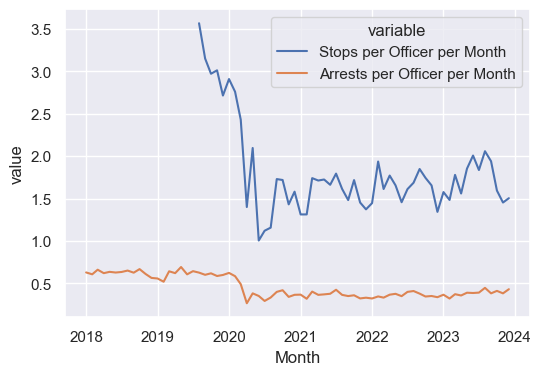

In [51]:
sns.set(rc={"figure.figsize": (6, 4)})

sns.lineplot(
    data=monthly_summary_rates[
        (monthly_summary_rates.Month > "2017-12-01")
        & (monthly_summary_rates.variable != "Incidents per Officer per Month")
    ],
    x="Month",
    y="value",
    hue="variable",
)

In [52]:
arrests_year_category = (
    arrest_data.groupby(["year", "category"]).ccn.count().reset_index()
)
arrests_year_category.pivot(columns="year", index="category", values="ccn").to_clipboard()
# manual cleanup done here: https://docs.google.com/spreadsheets/d/1N7FVH9PqlW8NjiL6RcXTV7vrrWRhN4aLlYmYrWlEXXM/edit?usp=sharing

In [53]:
arrests_year_category.pivot(columns="year", index="category", values="ccn")

year,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01,2023-01-01
category,,,,,,,,,,,
Aggravated Assault,284.0,282.0,235.0,194.0,174.0,133.0,139.0,91.0,97.0,88.0,125.0
Arson,3.0,6.0,6.0,5.0,4.0,4.0,4.0,5.0,NaN,4.0,6.0
Assault on a Police Officer,839.0,855.0,749.0,606.0,438.0,405.0,383.0,377.0,346.0,311.0,300.0
Assault with a Dangerous Weapon,1239.0,1277.0,1155.0,1058.0,860.0,785.0,668.0,582.0,571.0,475.0,409.0
Burglary,243.0,248.0,198.0,279.0,241.0,182.0,146.0,205.0,133.0,117.0,117.0
Damage to Property,588.0,675.0,706.0,822.0,814.0,738.0,691.0,668.0,623.0,600.0,637.0
Disorderly Conduct,890.0,852.0,656.0,628.0,757.0,469.0,352.0,236.0,65.0,110.0,109.0
Driving/Boating While Intoxicated,1311.0,1337.0,1078.0,1307.0,1306.0,1475.0,1305.0,950.0,835.0,627.0,643.0
Fraud and Financial Crimes,518.0,223.0,148.0,149.0,144.0,163.0,129.0,54.0,32.0,48.0,25.0


In [54]:
stop_data.stop_reason_nonticket.value_counts().tail(10)

stop_reason_nonticket
Demeanor during a field contact; Call for service; Individual<U+0092>s characteristics; Individual<U+0092>s actions; Suspicion of criminal activity (self-initiated)                      1
Individual<U+0092>s actions; Call for service; BOLO/Lookout; Individual<U+0092>s characteristics                                                                                          1
Observed a weapon; Call for service; Individual<U+0092>s actions; Demeanor during a field contact                                                                                         1
Warrant/court order; Information obtained from law enforcement sources; Individual<U+0092>s actions; Call for service                                                                     1
Information obtained from law enforcement sources; Observed a weapon; Call for service                                                                                                    1
Suspicion of criminal activity (self-i

In [55]:
arrest_data.head().T

,0,1,2,3,4
type,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest,Adult Arrest
year,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
date_,2013/11/14 05:00:00+00,2013/11/20 05:00:00+00,2013/12/03 05:00:00+00,2013/12/05 05:00:00+00,2013/12/09 05:00:00+00
hour,6,15,0,21,23
ccn,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...
arrest_number,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...
age,37,39,40,65,31
defendant_psa,Out of State,602,Out of State,502,702
defendant_district,Out of State,6D,Out of State,5D,7D
race,WHITE,BLACK,BLACK,BLACK,BLACK


<Axes: xlabel='month_year', ylabel='ccn'>

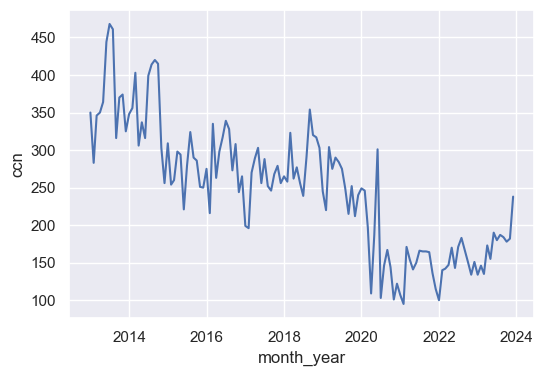

In [56]:
sns.lineplot(data=arrest_data[(arrest_data.offense_district=="3D")].groupby(["month_year"]).ccn.count().reset_index(), x="month_year", y="ccn")

In [57]:
arrest_data

,type,year,date_,hour,ccn,arrest_number,age,defendant_psa,defendant_district,race,ethnicity,sex,category,description,arrest_psa,arrest_district,arrest_blockx,arrest_blocky,offense_blocky,offense_blockx,offense_psa,offense_district,arrest_latitude,arrest_longitude,offense_latitude,offense_longitude,gis_id,creator,created,editor,edited,globalid,objectid,date,month_year
0,Adult Arrest,2013-01-01,2013/11/14 05:00:00+00,6,45bb932cb42f1bba872a8dfcfb2428a10d6fe0598a63f2...,1057043c3187ebc5c85920edbb441300e1446d3764e70f...,37,Out of State,Out of State,WHITE,NOT HISPANIC,MALE,Sex Abuse,Second Degree Sex Abuse- Incompetent,102.0,1D,398600.0,136300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_1,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{80CA3650-32C9-42C6-8412-9250D0E433BF},1.0,2013-11-14 05:00:00+00:00,2013-11-01
1,Adult Arrest,2013-01-01,2013/11/20 05:00:00+00,15,d558ea651a7b32e88571a453ccdf39376b2ec9dfb11f3c...,ad3f22534b1e2c409d66328bb4ac3904e9bacc768c6091...,39,602,6D,BLACK,NaN,MALE,Homicide,Murder I,602.0,6D,405900.0,137300.0,NaN,NaN,602,6D,NaN,NaN,NaN,NaN,ADULT_ARRESTS_2,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{F1B2E42E-38B5-49D6-8A60-BF8CF0690A12},2.0,2013-11-20 05:00:00+00:00,2013-11-01
2,Adult Arrest,2013-01-01,2013/12/03 05:00:00+00,0,85451f87475b042563ddebc20b89b7258f07bca9b55b77...,a723e9f1d0b44a6e0cef81994b8e7d3d3da55270e6f871...,40,Out of State,Out of State,BLACK,NaN,MALE,Prostitution,Solicting Prostitution,103.0,1D,399200.0,137200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_3,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{7F8BA37F-51F5-437F-A8F4-4B755385797B},3.0,2013-12-03 05:00:00+00:00,2013-12-01
3,Adult Arrest,2013-01-01,2013/12/05 05:00:00+00,21,3498c726acd19b8fc48c50a86c4e21e5823c41722cb779...,1a94d5a92f8538d3252aa65690ab70fac1a67646eb22ee...,65,502,5D,BLACK,NaN,MALE,Narcotics,Ucsa Pwid Heroin,102.0,1D,398400.0,136900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_4,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{70B94138-C9F4-4CFF-9A72-12B071F3A78C},4.0,2013-12-05 05:00:00+00:00,2013-12-01
4,Adult Arrest,2013-01-01,2013/12/09 05:00:00+00,23,88e342ab716f545b67c467914d6999d514ec6ea34d5c2e...,5a0e432aaa38e011a7b8aa29de617d4e635acab29b3db5...,31,702,7D,BLACK,NOT HISPANIC,MALE,Traffic Violations,No Permit,204.0,2D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADULT_ARRESTS_5,NaN,NaN,JLAY,2023/09/27 21:18:52+00,{2DCB5E7E-311F-48B8-A36B-BF1D6C2890F5},5.0,2013-12-09 05:00:00+00:00,2013-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275411,Adult,2023-01-01,2023-12-31,23,fb9b703ecf9568a3229c44c6040912c4f86bbddb,6ef2c06ff6a1dd03c535cb5a8dda934ebd76ae3e,29,402.0,4D,BLACK,NOT HISPANIC,MALE,Release Violations/Fugitive,Fugitive From Justice,405.0,4D,398600.0,140200.0,140200.0,398600.0,405,4D,38.930,-77.016,38.930,-77.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-01
275412,Adult,2023-01-01,2023-12-31,23,bf2cb2ac8052147bf1e3c207b9d61da28a9a2810,041055c6b46ec967b6f3af3d3bd9cc1f3d339d5a,29,507.0,5D,BLACK,NOT HISPANIC,MALE,Simple Assault,Simple Assault,507.0,5D,402300.0,137500.0,137500.0,402300.0,507,5D,38.905,-76.974,38.905,-76.974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-01
275413,Adult,2023-01-01,2023-12-31,23,68f2a1a713424941ab9f6eadb6c897e07de01d0b,2eaa6f4b9ad9709d7fe0c7ac72c5111abf7630f9,27,708.0,7D,BLACK,NOT HISPANIC,FEMALE,Weapon Violations,Carry Pistol W/o Lic -outside Home/business,604.0,6D,406200.0,135000.0,135000.0,406200.0,604,6D,38.883,-76.929,38.883,-76.929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-01
275414,Adult,2023-01-01,2023-12-31,23,b364f729796fceaac1c0d25c5710204a9214f554,61b2932a545960b104209222427b9e20a624597e,53,NaN,NaN,BLACK,UNKNOWN,MALE,Driving/Boating While Intoxicated,Driving Under The Influence Of Alcohol Or Drugs,106.0,1D,399300.0,133800.0,133800.0,399300.0,106,1D,38.872,-77.009,38.872,-77.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-31 00:00:00,2023-12-01


In [58]:
arrest_data[(arrest_data.offense_district=="3D") & arrest_data["year"].isin(["2019-01-01", "2023-01-01"])].groupby(["year", "category"]).ccn.count().reset_index().to_clipboard()

In [59]:
Sept 2023: 3328
Sept 2020: 3798
Sept 2019: 3795

SyntaxError: invalid syntax (1372522691.py, line 1)

In [ ]:
arrest_data.defendant_district.value_counts()

In [ ]:
arrest_data["defendant_out_of_state"] = (arrest_data.defendant_district == "Out of State") | (arrest_data.defendant_district.isna())

In [ ]:
arrest_data[(arrest_data.offense_district=="3D")].groupby(["year.1", "defendant_out_of_state"]).ccn.count()

## Juvenile Arrests

In [ ]:
juvenile_arrests = pd.read_csv("../data/raw/Juvenile_Arrests.csv")

In [ ]:
juvenile_arrests.columns = [c.lower() for c in juvenile_arrests.columns]

In [ ]:
juvenile_arrests["year"] = [d[:4] for d in juvenile_arrests.arrest_date.values]
juvenile_arrests["month_year"] = [d[:7].replace("/", "-") for d in juvenile_arrests.arrest_date.values]

In [ ]:
juvenile_arrests.month_year.value_counts().sort_index()

In [ ]:
msr = monthly_summary_rates[(monthly_summary_rates.Month > "2017-12-01") & (monthly_summary_rates.variable != "Incidents per Officer per Month")]

In [ ]:
msr.to_clipboard()

In [ ]:
incident_data[incident_data.year > "2023-12-31"].month_year.value_counts()

In [ ]:
stop_data.stop_reason_nonticket.value_counts()